# Lagrange point and their stability
## Given:
The linear variational equations of the colinear Lagrange points have two real and two imaginary roots.

## Find:
a) Earth-Moon system solve linear equation and plot equation for $L_1$ where $\xi_0 = 0.01$ and $eta_0 = 0$

b) What is the max distance from $L_1$. Period in day.

c) Find the Jacobi constant and plot the coressponding ZVC.

d) USE the IC conditions in the non-linear equations and compare the solutions. What happens if $\xi_0$ is smaller/ larger? How large can it be?

e) Repeat the analysis but for the real roots. Is departure hyperbolic? What is the time constant?

In [1]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import G
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Given 
system = "Earth-Moon"

gamma2, L2 = pn.L2_Newton(SS3.loc[system,'miu'],  0.01)
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)
gamma3, L3 = pn.L3_Newton(SS3.loc[system,'miu'],  0.9)

xi_0    = 0.01
eta_0   = 0
zeta_0  = 0 

### Part a)

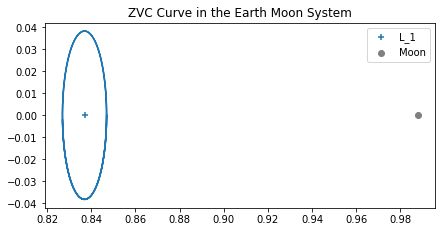

In [21]:
U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1+xi_0, 0, 0, SS3.loc[system,'miu']) 

beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
beta_3  = (s**2 + U_xx)/2/s

xi_dot_0    = eta_0*s/beta_3
eta_dot_0   = -beta_3*xi_0*s
zeta_dot_0  = 0

t_span = [0, 2*np.pi]
IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.scatter([L1],[0], marker="+", label = 'L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.plot(lin.y[0,:]+L1, lin.y[1,:])
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.legend()

### Part b)

In [19]:
max_dist = np.max( np.linalg.norm(lin.y[0:3], axis=0) )
print('Maximum distance:', round(max_dist,2))
print('Maximum distance (km):', round(pn.L_2_dim(max_dist, SS3.loc[system, 'l*']),2))

Maximum distance: 0.04
Maximum distance (km): 14662.02


### Part c)

C:\Users\Sushr\AppData\Local\Temp/ipykernel_30960/35826913.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black', label='ZVC')


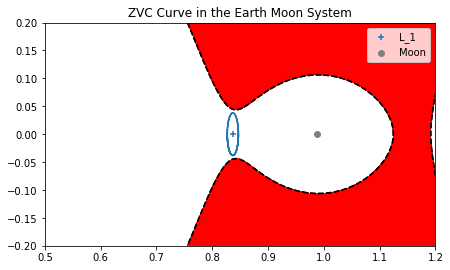

In [29]:
x_range = np.linspace(0.5, 1.2, 2000)
y_range = np.linspace(-0.2, 0.2, 2000)
v = np.linalg.norm([xi_dot_0, eta_dot_0, zeta_dot_0])

[X, Y] = np.meshgrid(x_range, y_range)
C = pn.Jacobi_const(X, Y, 0, 0, SS3.loc[system,'miu'])
C0 = pn.Jacobi_const(xi_0+L1, 0, 0, v, SS3.loc[system,'miu'])

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black', label='ZVC')
axs.scatter([L1],[0], marker="+", label = 'L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.plot(lin.y[0,:]+L1, lin.y[1,:])
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.legend()

### Part d)

C:\Users\Sushr\AppData\Local\Temp/ipykernel_30960/339096356.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black', label='ZVC')


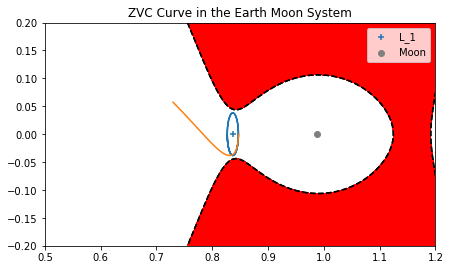

In [34]:
t_span = [0, 1.5]

IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black', label='ZVC')
axs.scatter([L1],[0], marker="+", label = 'L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.plot(lin.y[0,:]+L1, lin.y[1,:])
axs.plot(non_lin.y[0,:], non_lin.y[1,:])
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.legend()

### Part e)

In [ ]:
beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
beta_3  = (s**2 + U_xx)/2/s

xi_dot_0    = eta_0*alpha_1*lamda_1
eta_dot_0   = eya_0 * lamda_1/alpha_1
zeta_dot_0  = 0

t_span = [0, 2*np.pi]
IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.scatter([L1],[0], marker="+", label = 'L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.plot(lin.y[0,:]+L1, lin.y[1,:])
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.legend()